##Why Graph Neural Nets?


Traditionally, neural networks (ANN) assume that the input data is in the form of a table or Grid:

```
CNN -> Image processing using a grid of pixels

RNN -> For sequential data(eg a list of words)

MLP -> For tabular data (flat rows)
```

But in reality, data is often relational in nature:

- Social Networks
- Molecules (atoms and bonds)
- Financial Networks (companies and transactions)
- Recommender Sytems(users and items)

We leverage their relational nature by modelling them as graphs, whereby the nodes represent individual entities (such as users, products, or molecules) and the edges represent relationships or interactions between those entities, enabling the model to learn not just from features, but also from the structure of their connections.






**NOTE:** The acronymns "GNN" and "GCN (Graph convolution network) are used interchangably, with the main distinction being that GCN is a specific type of GNN where **aggregation is done via normalized adjacency matrices and shared weights**

##Foundation (Graph representation)

Take for example, the following dataset:

| ID | Age | Interest | Label (Influencer?) |
| -- | --- | -------- | ------------------- |
| 0  | 23  | Music    | 1                   |
| 1  | 45  | Finance  | 0                   |
| 2  | 31  | Music    | 1                   |
| 3  | 52  | Finance  | 0                   |
| 4  | 22  | Music    | 1                   |


**Understanding nodes and edges**


In the graph representation, each row of the dataset corresponds to a node, and its features define the node’s initial state.

In order to represent the connections/relationships between the nodes, we can use a list of node pairs.

For example, a connection between node 0 and 1 would be represented as (0, 1).

Our edges would, for example, take the following form:

```
(0,1), (0,2), (1,3), (2,4), (3,4)
```


Visually, this would look like this:

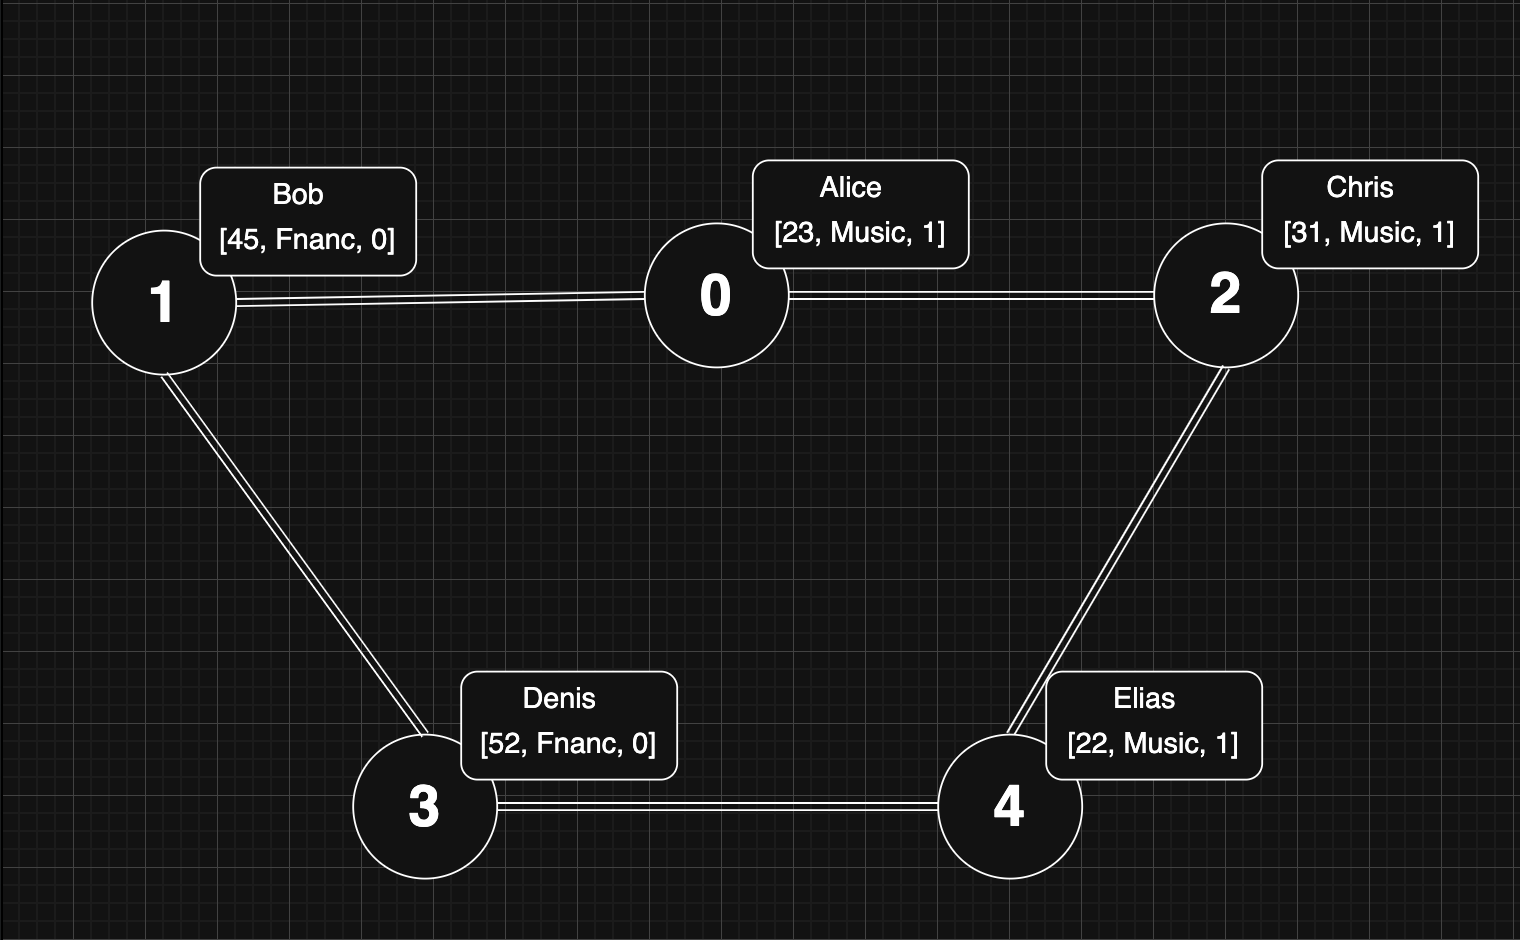

**Adacency Matrix**

In order to model the  above graph, we use an adjacency matrix (which nodes are connected?) :

```
   0  1  2  3  4
0 [0][1][1][0][0]
1 [1][0][0][1][0]
2 [1][0][0][0][1]
3 [0][1][0][0][1]
4 [0][0][1][1][0]
```



*Note: We use 1 to represent a connection, 0 otherwise*

Because the graph is undirected (bi-directional), the resulting matrix is symmetric.

Using the above matrix, we can see clearly which nodes are connected via edges

For example, in the first column (0), we can see that our node 0 is only connected to nodes 1 and 2, as represented by the presence of 1 and and absence of 0s.

**Feature matrix**

As shown in the graph image above, each of our nodes has associated features:
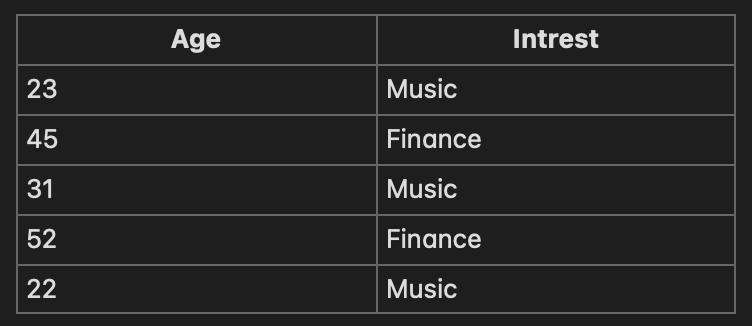

As with any ML task, we would need to represent these features in a way that's optimised for machine learning:

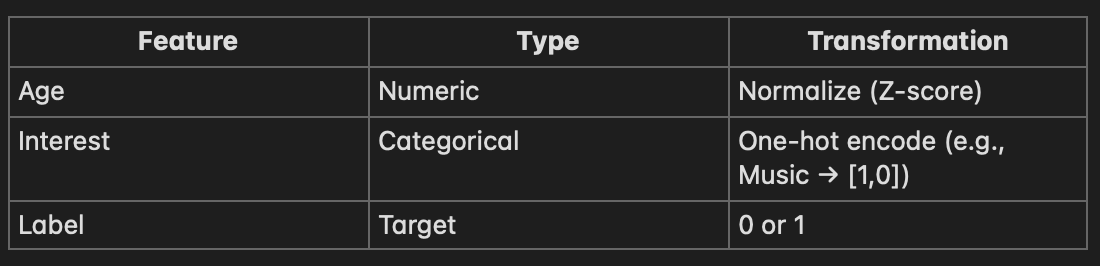

Thus, the transformed data (feature matrix) will take the following form:

```
Node 0 → [-1.06, 1, 0]
Node 1 → [ 0.65, 0, 1]
Node 2 → [-0.29, 1, 0]
Node 3 → [ 1.40, 0, 1]
Node 4 → [-1.29, 1, 0]

```

Finally, we can now represent the entire graph:

NODE FEATURES:
```
X = [
  [-1.06, 1, 0],
  [ 0.65, 0, 1],
  [-0.29, 1, 0],
  [ 1.40, 0, 1],
  [-1.29, 1, 0]
]
```
EDGES (edge_index):
```
edge_index = [
  [0, 0, 1, 2, 3, 1, 2, 3, 4],  # source
  [1, 2, 0, 4, 4, 0, 0, 1, 3]   # target
]

```



#Understanding the GCN Layer & Learning Process

In a Graph Neural Network, the model is made up of multiple layers (just like in a regular neural net)

*A 'layer' is simply a mathematical function that transforms input into output using learnable parameters*

When the first GNN layer (Layer1) is computing a new embedding for node 0, here's how it processes the information:

At layer1, node 0:

- Has features: ```[-1.06, 1, 0]```
- Neighbors: Node 1 ```[0.65, 0, 1]``` and Node 2 ```[-0.29, 1, 0]```

A GNN step would involve:

**Aggregate Neighbors:**
  ```mean([Node1, Node2]) -> avg([0.65, 0, 1], [-0.29, 1, 0]) = [0.18, 0.5, 0.5])```

**Combine with self(Node0):**
```
new_h0 = W_self × h0 + W_neigh × mean(neighbor_features)”

```
Where;

  h0 = Node0’s current feature vector (before layer update)

  W1 & W2 = Learnable weight matrices (or vectors), applied via matrix multiplication


So, in essence, the GNN updates the node embedding using:

  The node’s own features (```h0```)

  Neighbor features(```[0.18, 0.5, 0.5]```)

This happens for every node — with shared weights.

**NOTE**:
  In GCNs, W1 and W2 are often merged into one — there’s usually one shared W, applied to both self and neighbor features during aggregation.*

**NOTE**:
Add a note: "This is simplified; many GNNs use normalization and shared weights."
**Summary of GCN learning process:**

**NOTE:**
In practice, aggregation often includes degree normalization (D^-0.5 * A * D^-0.5) to avoid feature explosion.

```
Gather neighbor features

Include the node’s own features (h0)

Average them (or normalize)

Multiply by weight matrix W

Apply a non-linear activation function (e.g., ReLU)
```



##What Happens After One Pass?

**The model makes predictions**

Once the forward pass computes the new node embeddings. The model makes a prediction.

Let's say, for example, we want to predict who's an influencer from the given dataset (node classification):


```
logits = model(data)        # shape: [num_nodes, num_classes]
predictions = logits.argmax(dim=1)
```

These predictions are then compared to the true labels:

```
labels = torch.tensor([1, 0, 1, 0, 1])
loss = CrossEntropyLoss()(logits, labels)
```

**Learning = Backpropagation + Weight Updates**

Just like with ANNs, we


```
1. Compute the loss

  loss.backward()           # computes gradients w.r.t weights

2. Backpropagate the error

3. Update weights using gradient descent

  optimizer.step()          # updates W using gradients

```

***This is where the weight matrix W in your GCN layers actually learns.***



##Appendix

1. **Node:**
A single entity in a graph (e.g., a person in a social network).
2. **Edge:**
A connection between two nodes (e.g., a friendship or relationship).
3. **Graph:**
A structure made up of nodes and edges.
Can be:
  - Undirected (e.g., friendships)

  - Directed (e.g., follower → followed)
  
4. **Feature Vector:**
A numeric list describing a node.
  - Example:
  [Age: 23, Likes Music: 1, Likes Finance: 0]
5. **Embedding:**
A dense vector: (e.g., [0.3, -0.7, 1.1]) that represents a node in a way the neural network can understand.
It captures:

    - The node’s own features

    - Information from its neighbors

    - Learned relationships during training

  Think of it as a compressed summary of a node's role in the graph.

6. **Aggregation:**
The process of combining a node’s neighbors’ features.
Common methods:

  - Mean

  - Sum

  - Max

  - Attention-weighted

7. **Message Passing:**
Each node "sends" its features to its neighbors.
Then each node "receives" those messages, aggregates them, and updates its own state.

8. **GNN Layer:**
A function that:

  - Takes in each node’s features + neighbors

  - Aggregates and transforms them using learnable weights

  - Outputs a new node embedding

  Similar to a layer in an ANN, but respects graph structure.

9. **Forward Pass:**
The step where data flows through the network to produce predictions.
In GNNs, this involves:

  - Aggregating neighbor features

  - Applying transformations (weights + activation)

10. **Backpropagation:**
The process of computing gradients of the loss with respect to the weights.
These gradients are used to update the model so it gets better.

11. **Loss Function:**
A formula that measures how wrong the predictions are.
The model tries to minimize this loss during training.

12. **Node Classification:**
Predicting a label (e.g., “influencer” or not) for each node in the graph.

13. **Neighborhood:**
The set of nodes connected directly to a given node.

14. **Adjacency Matrix:**
A matrix that shows which nodes are connected to which.
If node i is connected to node j, then A[i][j] = 1.

